In [5]:
import pandas as pd

# Load the dataset
file_path = "laptop_price - dataset.csv"
laptop_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
laptop_data.head(), laptop_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

(  Company      Product   TypeName  Inches                    ScreenResolution  \
 0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
 1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
 2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
 3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
 4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
 
   CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
 0       Intel        Core i5                  2.3         8   
 1       Intel        Core i5                  1.8         8   
 2       Intel  Core i5 7200U                  2.5         8   
 3       Intel        Core i7                  2.7        16   
 4       Intel        Core i5                  3.1         8   
 
                 Memory GPU_Company                GPU_Type  OpSys  \
 0            128GB SSD       Intel  Iris Plus Gra

In [6]:
# Function to extract resolution details (width, height, and if it's IPS panel)
def extract_resolution_features(df):
    df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
    df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
    
    resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
    df['X_res'] = resolution[0].astype(int)
    df['Y_res'] = resolution[1].astype(int)
    
    df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype(float)
    
    return df.drop(columns=['ScreenResolution'])

# Function to extract memory details and convert them into numeric format
def extract_memory_features(df):
    df['Memory'] = df['Memory'].str.replace('GB', '').str.replace('TB', '000')
    
    new = df['Memory'].str.split('+', n=1, expand=True)
    
    df['First_Memory'] = new[0]
    df['First_Memory'] = df['First_Memory'].str.extract(r'(\d+)').astype(int)
    
    # Handling secondary memory in laptops with dual storage
    df['Second_Memory'] = new[1].str.extract(r'(\d+)').fillna(0).astype(int)
    
    return df.drop(columns=['Memory'])

# Apply the functions to the dataset
laptop_data_cleaned = extract_resolution_features(laptop_data)
laptop_data_cleaned = extract_memory_features(laptop_data_cleaned)

# Checking the processed data
laptop_data_cleaned.head()


,Company,Product,TypeName,Inches,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Touchscreen,IPS,X_res,Y_res,PPI,First_Memory,Second_Memory
0,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,2.3,8,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005,128,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel,Core i5,1.8,8,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940,128,0
2,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,8,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel,Core i7,2.7,16,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,3.1,8,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005,256,0


In [5]:
# Function to extract resolution details (width, height, and if it's IPS panel)
def extract_resolution_features(df):
    df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
    df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
    
    resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
    df['X_res'] = resolution[0].astype(int)
    df['Y_res'] = resolution[1].astype(int)
    
    df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype(float)
    
    return df.drop(columns=['ScreenResolution'])

# Function to extract memory details and convert them into numeric format
def extract_memory_features(df):
    df['Memory'] = df['Memory'].str.replace('GB', '').str.replace('TB', '000')
    
    new = df['Memory'].str.split('+', n=1, expand=True)
    
    df['First_Memory'] = new[0]
    df['First_Memory'] = df['First_Memory'].str.extract(r'(\d+)').astype(int)
    
    # Handling secondary memory in laptops with dual storage
    df['Second_Memory'] = new[1].str.extract(r'(\d+)').fillna(0).astype(int)
    
    return df.drop(columns=['Memory'])

# Apply the functions to the dataset
laptop_data_cleaned = extract_resolution_features(laptop_data)
laptop_data_cleaned = extract_memory_features(laptop_data_cleaned)

# Checking the processed data
laptop_data_cleaned.head()


,Company,Product,TypeName,Inches,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Touchscreen,IPS,X_res,Y_res,PPI,First_Memory,Second_Memory
0,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,2.3,8,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005,128,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel,Core i5,1.8,8,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940,128,0
2,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,8,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel,Core i7,2.7,16,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,3.1,8,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005,256,0


# Cleaned the 'Memory' and 'ScreenResolution' columns
For the 'Memory' column, we want to extract the storage capacity in GB. Here's how to convert it

In [7]:
def clean_memory(memory):
    memory = memory.replace('TB', '000')  # Convert TB to GB
    parts = memory.split()
    if 'GB' in parts[0]:
        return int(parts[0].replace('GB', ''))
    return 0

laptop_data['Memory (GB)'] = laptop_data['Memory'].apply(clean_memory)


# For the 'ScreenResolution' column, we'll extract the numerical resolution. Split the resolution into width and height

In [8]:
laptop_data['ScreenResolution'] = laptop_data['ScreenResolution'].str.extract(r'(\d+x\d+)')
laptop_data[['X_res', 'Y_res']] = laptop_data['ScreenResolution'].str.split('x', expand=True).astype(float)


# Finally, we can drop the original 'Memory' and 'ScreenResolution' columns:

In [9]:
laptop_data.drop(['Memory', 'ScreenResolution'], axis=1, inplace=True)


# Encoded Categorical Variables
To handle categorical variables like 'Company', 'Product', 'CPU_Company', etc., you can use one-hot encoding:

In [10]:
laptop_data_encoded = pd.get_dummies(laptop_data, drop_first=True)


# Defined Features and Target Variable
our target variable is the 'Price (Euro)', and your features are everything else:

In [11]:
X = laptop_data_encoded.drop('Price (Euro)', axis=1)
y = laptop_data_encoded['Price (Euro)']


# Split Data into Training and Testing Sets
To split the data for training and testing:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model (Linear Regression)
For simplicity, we can use Linear Regression to predict laptop prices:

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Evaluate the Model
Finally, make predictions on the test set and calculate evaluation metrics:

In [15]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2 Score: {r2}")


MAE: 33997131108.229046, MSE: 1.3612715880990097e+22, R2 Score: -2.7426231557602156e+16


      Actual Price (Euro)  Predicted Price (Euro)
1179                650.0            4.732516e+02
342                 716.0            7.688813e+02
649                1584.0            1.602304e+03
772                1020.0            2.200654e+10
803                1749.0            1.879025e+03


In [25]:
index = 4  # Change this index to check other laptops.

# Show the actual price and predicted price for the selected laptop
actual_price = y_test.iloc[index]
predicted_price = y_pred[index]

print(f"Actual Price: {actual_price} Euro")
print(f"Predicted Price: {predicted_price} Euro")


Actual Price: 1749.0 Euro
Predicted Price: 1879.0246276855469 Euro


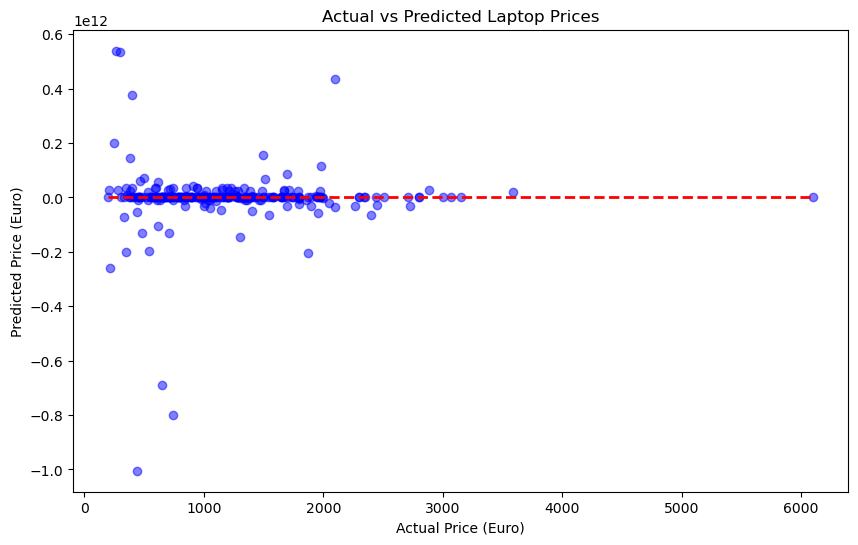

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (Euro)')
plt.ylabel('Predicted Price (Euro)')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()
